In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. bottom: 0.2455
	2. up: 0.2448
	3. round: 0.2294
	4. angle: 0.2203
	5. canvas: 0.2020
	6. three: 0.1529
	7. red: 0.1457
	8. four: 0.0994
	9. blue: 0.0949
	10. right: 0.0814

Top-n images with largest absolute values of logits:


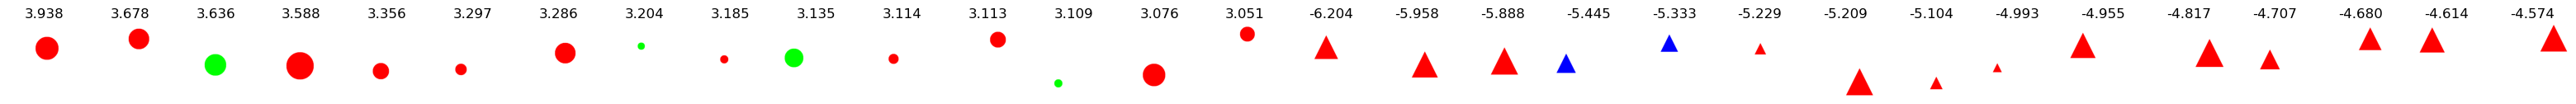

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. green: 0.5718
	2. blue: 0.2645
	3. four: 0.2304
	4. color: 0.1939
	5. <pad>: 0.1561
	6. white: 0.0968
	7. red: 0.0755
	8. left: 0.0711
	9. rotate: 0.0674
	10. up: 0.0631

Top-n images with largest absolute values of logits:


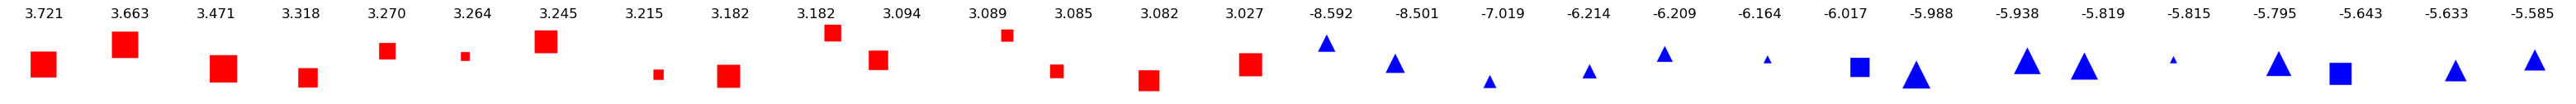

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. four: 0.5966
	2. <pad>: 0.4651
	3. red: 0.3335
	4. this: 0.0981
	5. has: 0.0946
	6. blue: 0.0842
	7. shape: 0.0755
	8. white: 0.0621
	9. blank: 0.0502
	10. green: 0.0495

Top-n images with largest absolute values of logits:


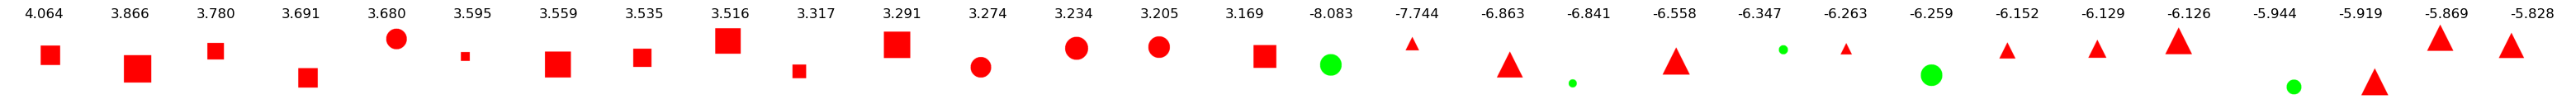

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. four: 0.5891
	2. blue: 0.4337
	3. <pad>: 0.3139
	4. green: 0.1463
	5. angle: 0.0960
	6. red: 0.0770
	7. canvas: 0.0757
	8. bottom: 0.0704
	9. has: 0.0636
	10. rotate: 0.0566

Top-n images with largest absolute values of logits:


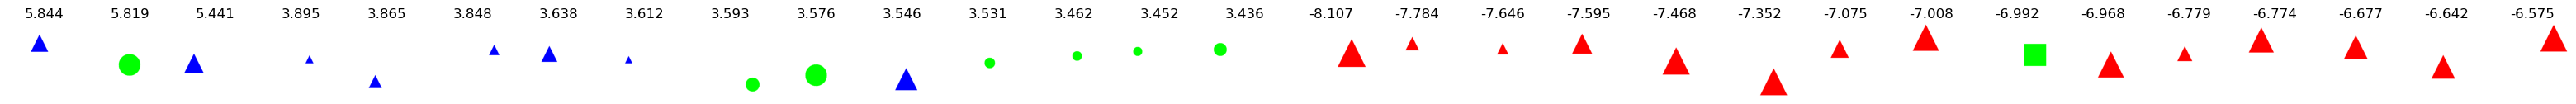

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. three: 0.4852
	2. <pad>: 0.3971
	3. red: 0.3158
	4. green: 0.1880
	5. four: 0.1664
	6. rotate: 0.0821
	7. blank: 0.0677
	8. color: 0.0645
	9. has: 0.0606
	10. bottom: 0.0601

Top-n images with largest absolute values of logits:


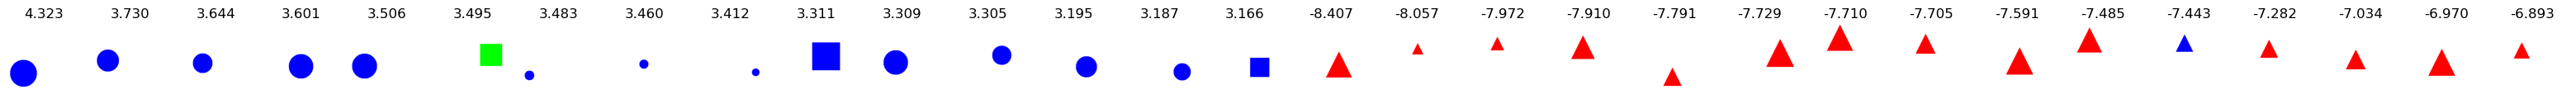

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. green: 0.4852
	2. four: 0.2631
	3. <pad>: 0.1940
	4. blue: 0.1509
	5. red: 0.1285
	6. left: 0.1110
	7. white: 0.0911
	8. canvas: 0.0891
	9. right: 0.0836
	10. round: 0.0739

Top-n images with largest absolute values of logits:


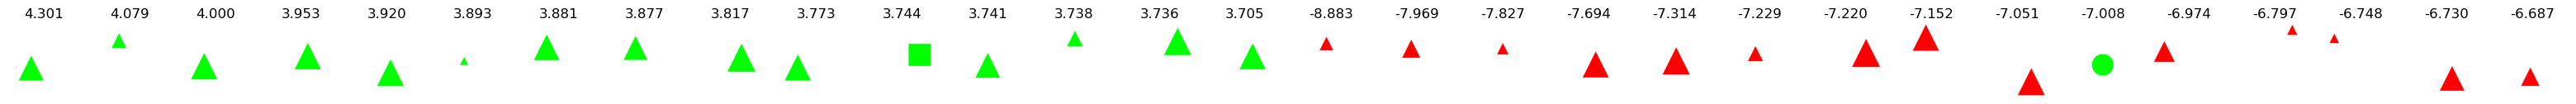

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. red: 0.5441
	2. three: 0.4999
	3. blue: 0.4460
	4. <pad>: 0.2455
	5. round: 0.1565
	6. green: 0.1215
	7. color: 0.1071
	8. up: 0.0658
	9. angle: 0.0534
	10. bottom: 0.0492

Top-n images with largest absolute values of logits:


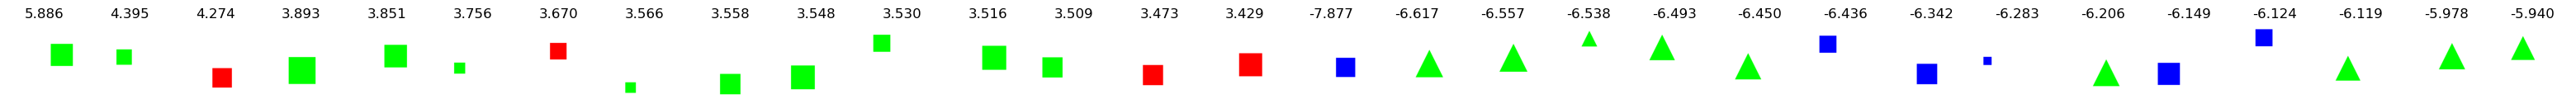

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. angle: 0.4966
	2. four: 0.4820
	3. <pad>: 0.2777
	4. blue: 0.1718
	5. green: 0.1393
	6. red: 0.1273
	7. round: 0.0509
	8. has: 0.0387
	9. rotate: 0.0363
	10. left: 0.0349

Top-n images with largest absolute values of logits:


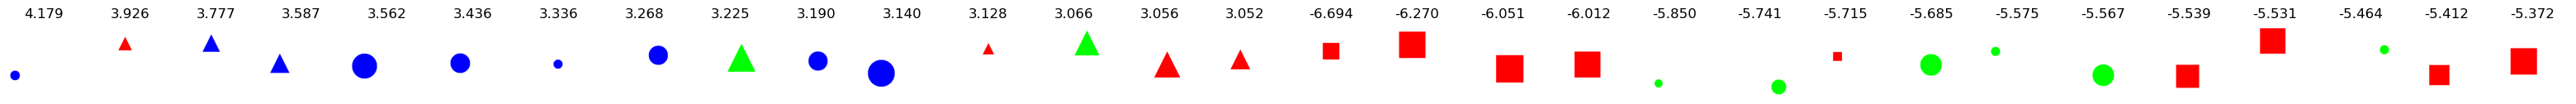

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. three: 0.4376
	2. blue: 0.4001
	3. <pad>: 0.3085
	4. green: 0.3015
	5. rotate: 0.0996
	6. four: 0.0897
	7. blank: 0.0865
	8. white: 0.0794
	9. color: 0.0787
	10. position: 0.0469

Top-n images with largest absolute values of logits:


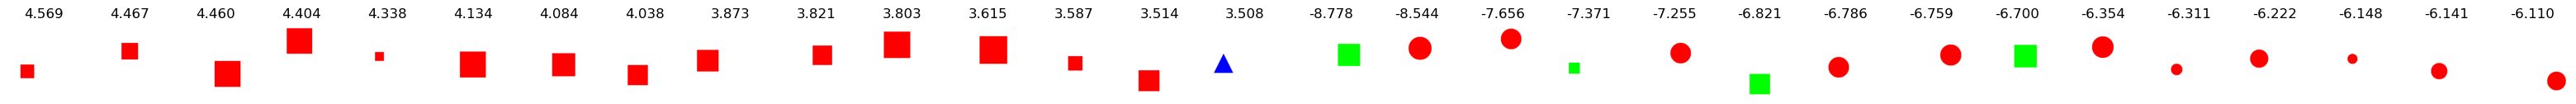

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. three: 0.5139
	2. blue: 0.3371
	3. <pad>: 0.3061
	4. canvas: 0.1607
	5. four: 0.1286
	6. red: 0.1201
	7. green: 0.1066
	8. bottom: 0.0955
	9. blank: 0.0713
	10. has: 0.0685

Top-n images with largest absolute values of logits:


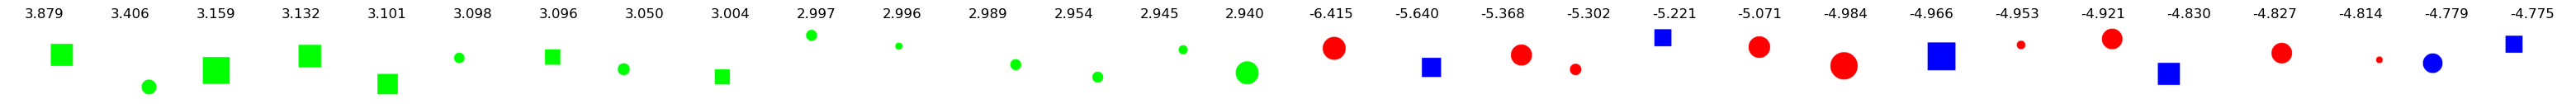

----------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)